In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
df = pd.read_csv('nation_level_daily.csv')

In [3]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [4]:
df['Date'].replace(to_replace=df['Date'].unique(),value=list(range(0,len(df['Date'].unique()))),inplace=True)

In [5]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,0,1,1,0,0,0,0
1,1,0,1,0,0,0,0
2,2,0,1,0,0,0,0
3,3,1,2,0,0,0,0
4,4,1,3,0,0,0,0


In [6]:
X=df[['Date', 'Total Confirmed', 'Daily Recovered', 'Total Recovered',
       'Daily Deceased', 'Total Deceased']]
X.head()

,Date,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,0,1,0,0,0,0
1,1,1,0,0,0,0
2,2,1,0,0,0,0
3,3,2,0,0,0,0
4,4,3,0,0,0,0


In [7]:
Y=df[['Daily Confirmed']]
Y.head()

,Daily Confirmed
0,1
1,0
2,0
3,1
4,1


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.20, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
print('whole set:',X.shape)

Train set: (144, 6) (144, 1)
Test set: (36, 6) (36, 1)
whole set: (180, 6)


In [9]:
Confirmed = LinearRegression()
Confirmed.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
Y_pred = Confirmed.predict(np.array(X_test))

In [11]:
r2_score(Y_test,Y_pred)

0.9957341801064679

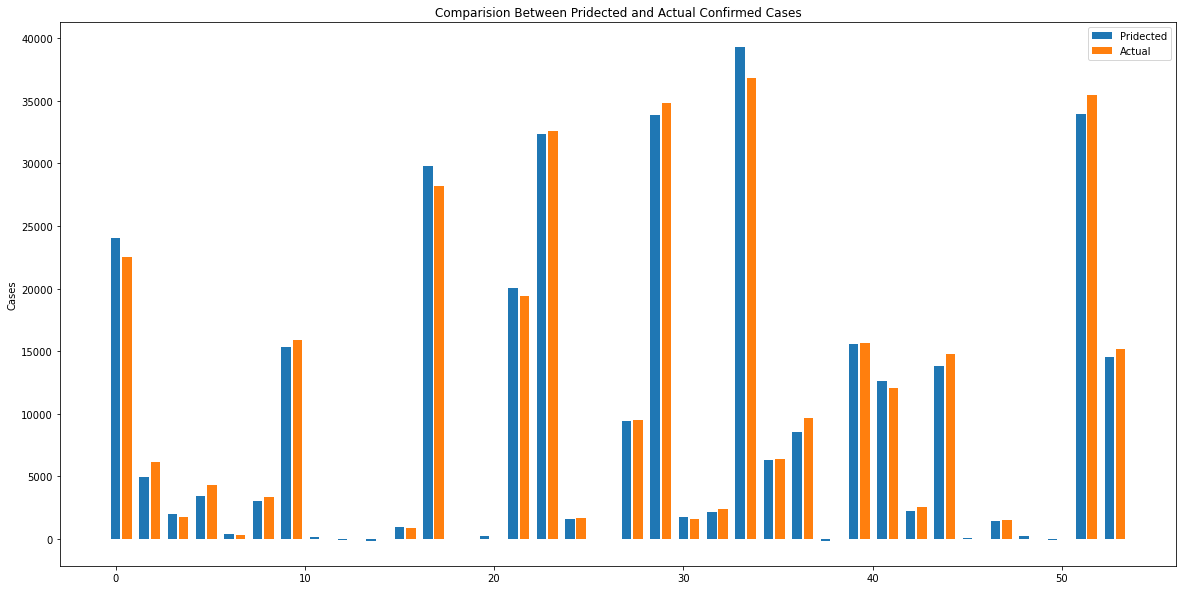

In [12]:
plt.figure(figsize = (20, 10))
plt.title('Comparision Between Pridected and Actual Confirmed Cases')
indices = np.arange(0, Y_pred.shape[0] * 1.5, 1.5)
plt.bar(indices, np.reshape(Y_pred, 36), width = 0.5, label = 'Pridected')
plt.bar(indices + 0.6, np.reshape(Y_test['Daily Confirmed'], 36), width = 0.5, label = 'Actual')
plt.legend()
a = plt.ylabel('Cases')

In [13]:
X1=df[['Date', 'Daily Confirmed','Total Confirmed', 'Total Recovered',
       'Daily Deceased', 'Total Deceased']]
X1.head()

,Date,Daily Confirmed,Total Confirmed,Total Recovered,Daily Deceased,Total Deceased
0,0,1,1,0,0,0
1,1,0,1,0,0,0
2,2,0,1,0,0,0
3,3,1,2,0,0,0
4,4,1,3,0,0,0


In [14]:
Y1 = df[['Daily Recovered']]
Y1.head()

,Daily Recovered
0,0
1,0
2,0
3,0
4,0


In [15]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size=0.20, random_state=4)
print ('Train set:', X1_train.shape,  Y1_train.shape)
print ('Test set:', X1_test.shape,  Y1_test.shape)
print('whole set:',X1.shape)

Train set: (144, 6) (144, 1)
Test set: (36, 6) (36, 1)
whole set: (180, 6)


In [16]:
Recovered = LinearRegression()
Recovered.fit(X1_train,Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
Y1_pred = Recovered.predict(np.array(X1_test))

In [18]:
r2_score(Y1_test,Y1_pred)

0.9540623553457342

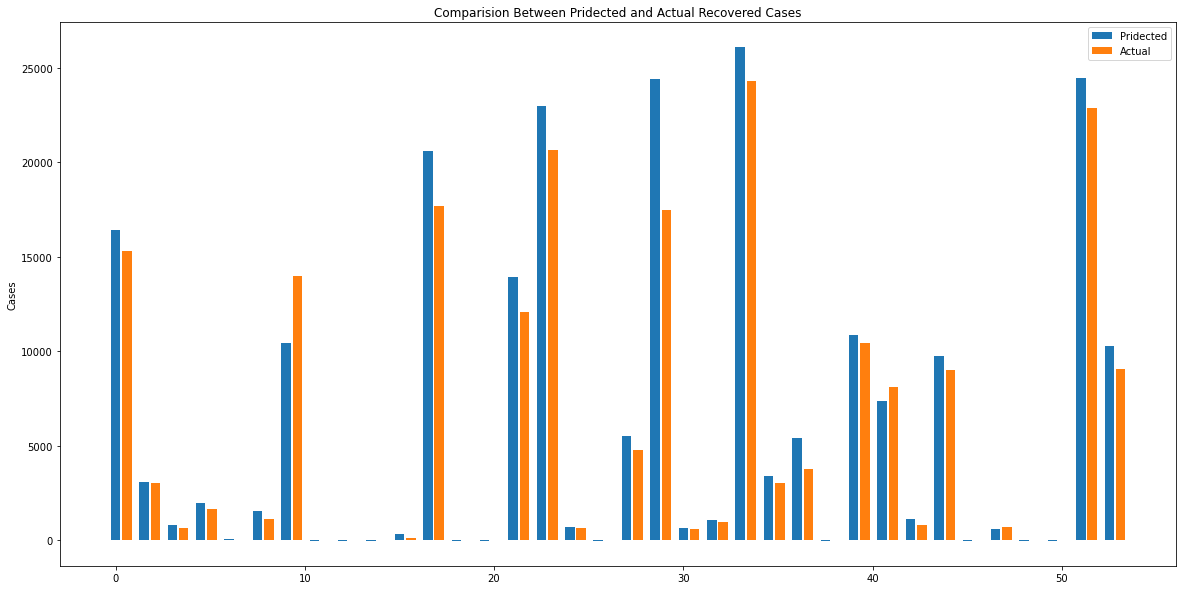

In [19]:
plt.figure(figsize = (20, 10))
plt.title('Comparision Between Pridected and Actual Recovered Cases')
indices = np.arange(0, Y1_pred.shape[0] * 1.5, 1.5)
plt.bar(indices, np.reshape(Y1_pred, 36), width = 0.5, label = 'Pridected')
plt.bar(indices + 0.6, np.reshape(Y1_test['Daily Recovered'], 36), width = 0.5, label = 'Actual')
plt.legend()
a = plt.ylabel('Cases')